

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації




<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Підключаю бібліотеки

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

Зчитую дані з файлу на Google Drive у датафрейм

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filename = "/content/drive/My Drive/Data2.csv"
df = pd.read_csv(filename, sep=';', encoding='cp1252')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


Виводжу перші 10 рядків

In [ ]:
df.head(10)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
5,Angola,Sub-Saharan Africa,"3308,700233",28813463.0,"34763,16",1246700
6,Antigua and Barbuda,Latin America & Caribbean,"14462,17628",100963.0,"531,715",440
7,Argentina,Latin America & Caribbean,"12440,32098",43847430.0,"204024,546",2780400
8,Armenia,Europe & Central Asia,"3614,688357",2924816.0,"5529,836",29740
9,Aruba,Latin America & Caribbean,NaN,104822.0,"872,746",180


Відображаю основну інформацію про датафрейм

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


Підсумок стовпців із числовим типом.

In [ ]:
df.describe()

,Populatiion
count,2.160000e+02
mean,3.432256e+07
std,1.347600e+08
min,1.109700e+04
25%,7.900265e+05
50%,6.221590e+06
75%,2.350337e+07
max,1.378665e+09


Підсумок стовпців не лише з числовим типом.

In [ ]:
df.describe(include = "all")

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,190,2.160000e+02,205,217
unique,217,7,190,NaN,202,213
top,Afghanistan,Europe & Central Asia,"561,7787463",NaN,"6318,241",460
freq,1,58,1,NaN,2,3
mean,NaN,NaN,NaN,3.432256e+07,NaN,NaN
std,NaN,NaN,NaN,1.347600e+08,NaN,NaN
min,NaN,NaN,NaN,1.109700e+04,NaN,NaN
25%,NaN,NaN,NaN,7.900265e+05,NaN,NaN
50%,NaN,NaN,NaN,6.221590e+06,NaN,NaN
75%,NaN,NaN,NaN,2.350337e+07,NaN,NaN


Переглядаю типи даних для кожного стовпця.

In [ ]:
df.dtypes

Country Name       object
Region             object
GDP per capita     object
Populatiion       float64
CO2 emission       object
Area               object
dtype: object

Перевіряю на відсутні значення.

In [ ]:
df.isnull()

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
212,False,False,True,False,True,False
213,False,False,False,False,True,False
214,False,False,False,False,False,False
215,False,False,False,False,False,False


In [ ]:
missing_data = df.isna().sum()
print(missing_data)

Country Name       0
Region             0
GDP per capita    27
Populatiion        1
CO2 emission      12
Area               0
dtype: int64


Бачу наступні проблеми в даних:
1. Помилка в написанні заголовку колонки "Populatiion" - має бути "Population".
2. У самій таблиці в колонках "GDP per capita" та "CO2 emission" значення розділені комами по 3 цифри для зручності читання, проте при зчитуванні за допомогою df.head() коми сприймаються як відділення цілої чатини від дробової. Також дробова частина в колонці "Area" записана через кому, черз що значення визначається як рядок, а має як float. Також у 3, 4, 6 колонках є від'ємні значення.
3. Проблема 3. Проблема 3. Невідповідні типи даних у всіх колонках, окрім двох перших.
4. Є пропущені значення в колонках "GDP per capita", "Populatiion", "CO2 emission".


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1. Помилка в написанні заголовку колонки "Populatiion" - має бути "Population".</b>
<p>
    Для виправлення перейменую колонку.
</p>

In [ ]:
df.rename(columns={'Populatiion':'Population'}, inplace=True)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470


<b>Проблема 2. У самій таблиці в колонках "GDP per capita" та "CO2 emission" значення розділені комами по 3 цифри для зручності читання, проте при зчитуванні за допомогою df.head() коми сприймаються як відділення цілої чатини від дробової. Також дробова частина в колонці "Area" записана через кому, черз що значення визначається як рядок, а має як float. Також у 3, 4, 6 колонках є від'ємні значення.</b>
<p>
    Для виправлення у 3 та 4 рядках повидаляю коми, у "Area" зміню кому на крапку та замість від'ємних чисел запишу їх модуль.
</p>

In [ ]:
def delete_commas(df, column_list):
  for column in column_list:
    df[column] = df[column].astype("str").replace(',', '').astype("float")
    df[column] = df[column].abs()
  return df

df = delete_commas(df, ['GDP per capita', 'CO2 emission'])

df['Area'] = df['Area'].astype("str").str.replace(',', '.').astype("float")
df['Area'] = df['Area'].abs()

df.head(200)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,5.617787e+09,34656032,9809225.0,652860.0
1,Albania,Europe & Central Asia,4.124982e+08,2876101,5716853.0,28750.0
2,Algeria,Middle East & North Africa,3.916882e+09,40606052,145400217.0,2381740.0
3,American Samoa,East Asia & Pacific,1.183475e+09,55599,113349248.0,200.0
4,Andorra,Europe & Central Asia,3.698862e+09,77281,462042.0,470.0
...,...,...,...,...,...,...
195,Tonga,East Asia & Pacific,3.748642e+09,107122,121011.0,750.0
196,Trinidad and Tobago,Latin America & Caribbean,1.604052e+09,1364962,46273873.0,5130.0
197,Tunisia,Middle East & North Africa,3.688646e+09,11403248,28829954.0,163610.0
198,Turkey,Europe & Central Asia,1.086260e+08,79512426,34598145.0,785350.0


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Заповнювати пропуски для ознаки такої-то буду таким-то способом, тому що ...

In [ ]:
avg_gdp=df['GDP per capita'].astype('float').mean(axis=0)
df.replace({'GDP per capita':np.nan}, avg_gdp, inplace=True)

avg_population=df['Population'].astype('float').mean(axis=0)
df.replace({'Population':np.nan}, avg_population, inplace=True)

avg_co=df['CO2 emission'].astype('float').mean(axis=0)
df.replace({'CO2 emission':np.nan}, avg_co, inplace=True)

Досліджую структуру даних, чи всі пропуски заповнено


In [ ]:
missing_data = df.isna().sum()
print(missing_data)

Country Name      0
Region            0
GDP per capita    0
Population        0
CO2 emission      0
Area              0
dtype: int64


<b>Проблема 3. Невідповідні типи даних у всіх колонках, окрім двох перших.</b>
<p>
    Для виправлення у 3-5 колонках варто змінити тип на int, у 6 на float.
</p>

In [ ]:
df[["GDP per capita", "Population", "CO2 emission"]] = df[["GDP per capita", "Population", "CO2 emission"]].astype("int")
df[["Area"]] = df[["Area"]].astype("float")
df.dtypes

Country Name           object
Region                 object
GDP per capita          int64
Population              int64
CO2 emission            int64
Area                  float64
Population density    float64
Population density    float64
Population density    float64
dtype: object

 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую за формулою Population/Area.


In [ ]:
population_density = df['Population']/df['Area']
df = pd.concat([df, population_density], axis=1)
df.rename(columns={0:'Population density'}, inplace=True)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,Population density,Population density,Population density
0,Afghanistan,South Asia,5617787463,34656032,9809225,652860.0,53.083405,53.083405,53.083405,53.083405
1,Albania,Europe & Central Asia,412498239,2876101,5716853,28750.0,100.038296,100.038296,100.038296,100.038296
2,Algeria,Middle East & North Africa,3916881571,40606052,145400217,2381740.0,17.048902,17.048902,17.048902,17.048902
3,American Samoa,East Asia & Pacific,1183474523,55599,113349248,200.0,277.995000,277.995000,277.995000,277.995000
4,Andorra,Europe & Central Asia,3698862203,77281,462042,470.0,164.427660,164.427660,164.427660,164.427660


In [ ]:
df.drop('Population density', axis=1)

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,5617787463,34656032,9809225,652860.0
1,Albania,Europe & Central Asia,412498239,2876101,5716853,28750.0
2,Algeria,Middle East & North Africa,3916881571,40606052,145400217,2381740.0
3,American Samoa,East Asia & Pacific,1183474523,55599,113349248,200.0
4,Andorra,Europe & Central Asia,3698862203,77281,462042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,3748945584,102951,113349248,350.0
213,West Bank and Gaza,Middle East & North Africa,2943404534,4551566,113349248,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990334774,27584213,2269873,527970.0
215,Zambia,Sub-Saharan Africa,1269573537,16591390,4503076,752610.0


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


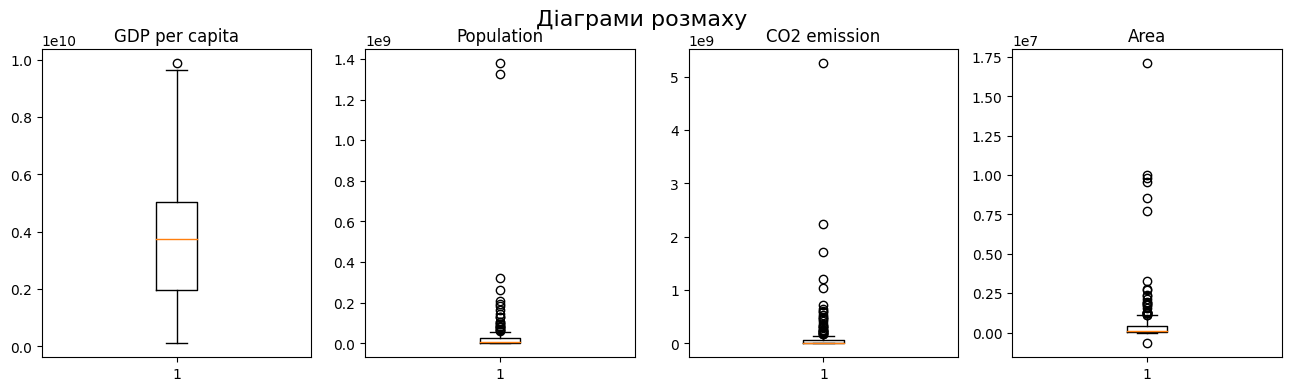

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

axs[4].set_title('Population density')
axs[4].boxplot(df['Population density'])

plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




Text(0.5, 1.0, 'Dependence between CO2 emission and population')

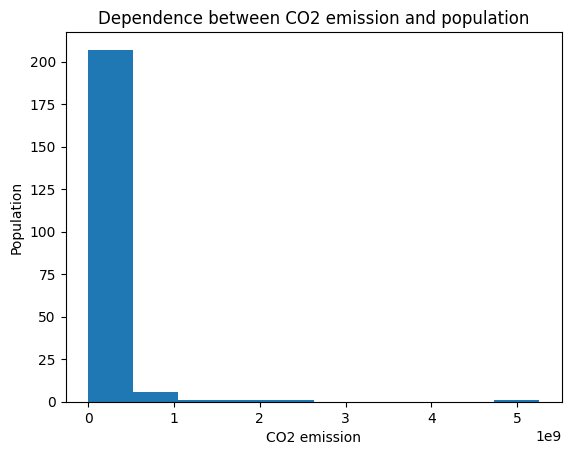

In [ ]:
plt.hist(df['CO2 emission'])
plt.xlabel("CO2 emission")
plt.ylabel("Population")
plt.title("Dependence between CO2 emission and population")

<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [ ]:
df.loc[df['GDP per capita'].idxmax()]

Country Name            Maldives
Region                South Asia
GDP per capita        9875278428
Population                417492
CO2 emission             1334788
Area                       300.0
Population density       1391.64
Population density       1391.64
Population density       1391.64
Population density       1391.64
Name: 121, dtype: object

In [ ]:
print("1. " + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину.')

1. Maldives має найбільший ВВП на людину.


In [ ]:
print("2. " + df.loc[df['Area'].idxmin(), 'Country Name'] + ' має найменшу площу.')

2. Myanmar має найменшу площу.


In [ ]:
print("3. " + df.loc[df['Population density'].idxmax(), 'Country Name'] + ' має найбільшу щільність у світі.')

europe_central_asia = df[df['Region'] == 'Europe & Central Asia']
country_max_density = europe_central_asia.loc[europe_central_asia['Population density'].idxmax(), 'Country Name']
print("Країна з найбільшою щільністю населення у світі серед країн Європи та Центральної Азії: ", country_max_density)

116    3. Macao SAR, China має найбільшу щільність у ...
116    3. Macao SAR, China має найбільшу щільність у ...
116    3. Macao SAR, China має найбільшу щільність у ...
116    3. Macao SAR, China має найбільшу щільність у ...
Name: Country Name, dtype: object
Країна з найбільшою щільністю населення у світі серед країн Європи та Центральної Азії:  130    Monaco
130    Monaco
130    Monaco
130    Monaco
Name: Country Name, dtype: object


In [ ]:
print("Топ-5 країн за ВВП на людину:")
print(df.sort_values(by='GDP per capita', ascending=False).head()['Country Name'])

print("\nОстанні 5 країн за ВВП на людину:")
print(df.sort_values(by='GDP per capita', ascending=True).head()['Country Name'])

Топ-5 країн за ВВП на людину:
121     Maldives
126    Mauritius
166      Senegal
159      Romania
181    St. Lucia
Name: Country Name, dtype: object

Останні 5 країн за ВВП на людину:
198         Turkey
46      Costa Rica
86         Hungary
114      Lithuania
45     Congo, Rep.
Name: Country Name, dtype: object


Збережіть дані у новий файл 'clean_data2.csv':


In [ ]:
df.to_csv("Data2_done_with_labels.csv", index=True)
from google.colab import files

files.download('Data2_done_with_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h2>Виконав студент групи ІП-23  <br>Востріков Любомир</h2>
